In [1]:
import numpy as np
import scipy as sp
import arviz as az

In [2]:
N_10_b = np.empty(shape = (10,2))
N_100_b = np.empty(shape = (10,2))
N_1000_b = np.empty(shape = (10,2))
N_10_g = np.empty(shape = (10,2))
N_100_g = np.empty(shape = (10,2))
N_1000_g = np.empty(shape = (10,2))

In [3]:
for i in range(1,11):
    b_10 = np.ndarray.flatten(np.genfromtxt(f"../Data/Traj_{i}_N_10_b.csv", delimiter= ","))
    b_100 = np.ndarray.flatten(np.genfromtxt(f"../Data/Traj_{i}_N_100_b.csv", delimiter= ","))
    b_1000 = np.ndarray.flatten(np.genfromtxt(f"../Data/Traj_{i}_N_1000_b.csv", delimiter= ","))
    g_10 = np.ndarray.flatten(np.genfromtxt(f"../Data/Traj_{i}_N_10_g.csv", delimiter= ","))
    g_100 = np.ndarray.flatten(np.genfromtxt(f"../Data/Traj_{i}_N_100_g.csv", delimiter= ","))
    g_1000 = np.ndarray.flatten(np.genfromtxt(f"../Data/Traj_{i}_N_1000_g.csv", delimiter= ","))


    N_10_b[i-1][0] = az.kde(b_10)[0][np.argmax(az.kde(b_10)[1])]
    N_10_b[i-1][1] = np.std(b_10)

    N_100_b[i-1][0] = az.kde(b_100)[0][np.argmax(az.kde(b_100)[1])]
    N_100_b[i-1][1] = np.std(b_100)

    N_1000_b[i-1][0] = az.kde(b_1000)[0][np.argmax(az.kde(b_1000)[1])]
    N_1000_b[i-1][1] = np.std(b_1000)

    N_10_g[i-1][0] = az.kde(g_10)[0][np.argmax(az.kde(g_10)[1])]
    N_10_g[i-1][1] = np.std(g_10)

    N_100_g[i-1][0] = az.kde(g_100)[0][np.argmax(az.kde(g_100)[1])]
    N_100_g[i-1][1] = np.std(g_100)

    N_1000_g[i-1][0] = az.kde(g_1000)[0][np.argmax(az.kde(g_1000)[1])]
    N_1000_g[i-1][1] = np.std(g_1000)

array([[<Axes: title={'center': 'x'}>]], dtype=object)

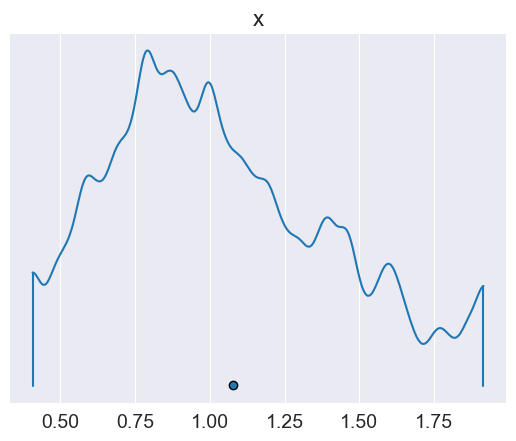

In [4]:
az.plot_density(g_10)

In [5]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import time

In [28]:
plot_traj_b = np.empty(shape=(10,4))
plot_traj_g = np.empty(shape=(10,4))
box_b = np.empty(shape= (30,2))
box_g = np.empty(shape= (30,2))

for i in range(10):
    plot_traj_b[i,0] = i +1
    plot_traj_b[i,1] = N_10_b[:,0][i]
    plot_traj_b[i,2] = N_100_b[:,0][i]
    plot_traj_b[i,3] = N_1000_b[:,0][i]

    plot_traj_g[i,0] = i +1
    plot_traj_g[i,1] = N_10_g[:,0][i]
    plot_traj_g[i,2] = N_100_g[:,0][i]
    plot_traj_g[i,3] = N_1000_g[:,0][i]

for j in range(30):
    if j < 10:
        box_b[j,0] = N_10_b[:,0][j]
        box_b[j,1] = "10"

        box_g[j,0] = N_10_g[:,0][j]
        box_g[j,1] = "10"
    elif 10 <= j < 20:
        box_b[j,0] = N_100_b[:,0][j-10]
        box_b[j,1] = "100"

        box_g[j,0] = N_100_g[:,0][j-10]
        box_g[j,1] = "100"
    else:
        box_b[j,0] = N_1000_b[:,0][j-20]
        box_b[j,1] = "1000"

        box_g[j,0] = N_1000_g[:,0][j-20]
        box_g[j,1] = "1000"

In [29]:
df_b = pd.DataFrame(box_b)
df_g =pd.DataFrame(box_g)
df_b.columns = ["b","N"]
df_g.columns = ["g","N"]
print(df_b)

           b       N
0   2.898753    10.0
1   3.038677    10.0
2   2.621420    10.0
3   1.600143    10.0
4   2.998670    10.0
5   3.175849    10.0
6   2.787488    10.0
7   2.401303    10.0
8   2.550664    10.0
9   2.389350    10.0
10  3.146059   100.0
11  3.268702   100.0
12  3.114876   100.0
13  2.934024   100.0
14  3.177669   100.0
15  3.102814   100.0
16  3.058323   100.0
17  3.015198   100.0
18  2.911299   100.0
19  2.980185   100.0
20  3.219712  1000.0
21  3.301685  1000.0
22  3.083724  1000.0
23  2.914578  1000.0
24  3.117574  1000.0
25  3.110580  1000.0
26  3.062364  1000.0
27  3.076550  1000.0
28  2.995939  1000.0
29  3.080687  1000.0


In [30]:
from src.baseSIR import mle
from src.baseSIR import mle_sir
def opt_mle(paras):
    return - mle(paras[0],paras[1],timed_real,times_real,tmax)

In [26]:
mle_b = []
mle_g = []
for i in range(1,11):
    X0 = [900,100,0]
    beta = 3
    gamma = 1
    mu = 0
    tmax = 10
    tstep = 0.05

    rng = np.random.default_rng(i)
    start_time = time.time()
    reality,times_real, timed_real = mle_sir(X0, mu, beta, gamma, tmax,tstep,rng=rng)
    #print(f"Reality took {time.time() - start_time} seconds to run!")
    times = np.arange(0,tmax,tstep)
    found = False
    for j in range(10):
        w = sp.optimize.minimize(opt_mle,x0=(2.5+j/10,0.5+j/10))
        if found == False:
            found = True
            best_b = w.x[0]
            best_g = w.x[1]
            best = w.fun
        elif w.fun > best:
            best_b = w.x[0]
            best_g = w.x[1]
    mle_b.append(best_b)
    mle_g.append(best_g)

C:\Users\ollie\PycharmProjects\PLS Research\src\baseSIR.py:149: RuntimeWarning: invalid value encountered in log
  L1 += np.log(pre_expo*np.exp(expo))
C:\Users\ollie\PycharmProjects\PLS Research\src\baseSIR.py:149: RuntimeWarning: overflow encountered in exp
  L1 += np.log(pre_expo*np.exp(expo))
C:\Users\ollie\PycharmProjects\PLS Research\src\baseSIR.py:153: RuntimeWarning: overflow encountered in exp
  L1 += np.log(pre_expo*np.exp(expo))
C:\Users\ollie\PycharmProjects\PLS Research\src\baseSIR.py:149: RuntimeWarning: overflow encountered in scalar multiply
  L1 += np.log(pre_expo*np.exp(expo))
C:\Users\ollie\PycharmProjects\PLS Research\src\baseSIR.py:153: RuntimeWarning: overflow encountered in scalar multiply
  L1 += np.log(pre_expo*np.exp(expo))
C:\Users\ollie\PycharmProjects\PLS Research\src\baseSIR.py:153: RuntimeWarning: invalid value encountered in log
  L1 += np.log(pre_expo*np.exp(expo))
C:\Users\ollie\PycharmProjects\PLS Research\src\baseSIR.py:149: RuntimeWarning: invalid va

In [27]:
print(mle_b)
print(mle_g)

[3.184405288476747, 3.1216677379291844, 3.034498127830499, 2.990006582525049, 3.124640065561458, 3.0669650179271994, 2.981880777138526, 2.8952207729968693, 2.9676006685580627, 3.02839260911723]
[0.945137591616599, 1.0230675992472982, 0.9994580550228575, 1.0214019326094719, 0.9568579626111692, 1.0479374365922942, 0.999466811319234, 0.9647788824595093, 0.9658697005153373, 0.9893175534753355]


<Axes: xlabel='N', ylabel='b'>

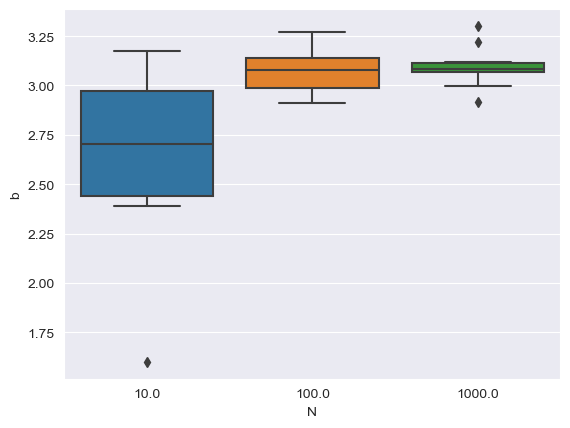

In [31]:
sns.boxplot(df_b,x="N",y="b")

<Axes: xlabel='N', ylabel='g'>

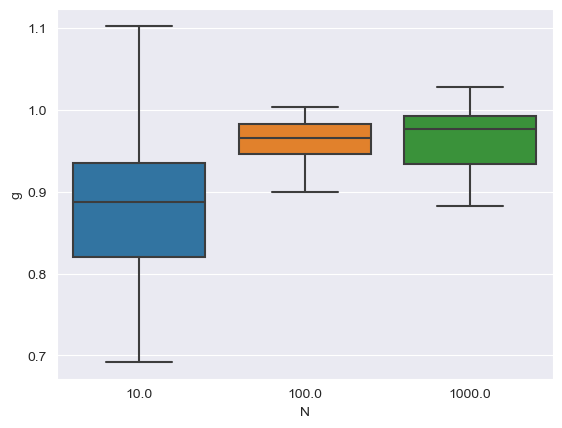

In [32]:
sns.boxplot(df_g,x="N",y="g")

<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

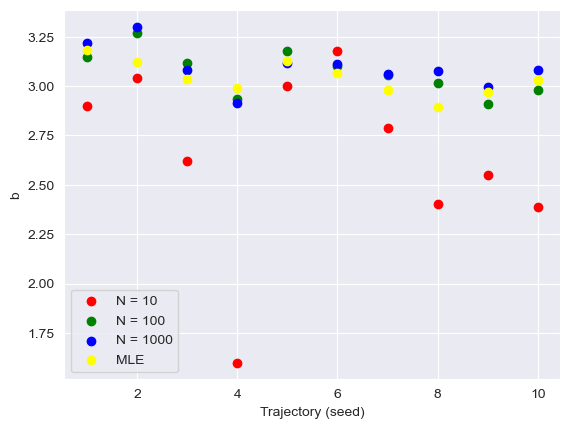

In [35]:
fig, ax0 = plt.subplots()
ax0.scatter(plot_traj_b[:,0],plot_traj_b[:,1], color = "red", label = "N = 10")
ax0.scatter(plot_traj_b[:,0],plot_traj_b[:,2], color = "green", label = "N = 100")
ax0.scatter(plot_traj_b[:,0],plot_traj_b[:,3], color = "blue", label = "N = 1000")
ax0.scatter(plot_traj_b[:,0],mle_b, color = "yellow", label = "MLE")
ax0.set_xlabel("Trajectory (seed)")
ax0.set_ylabel("b")
ax0.legend()
fig.show

<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

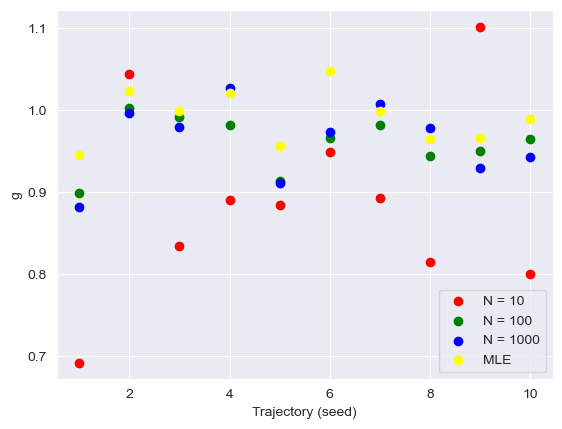

In [36]:
fig, ax0 = plt.subplots()
ax0.scatter(plot_traj_g[:, 0], plot_traj_g[:, 1], color="red", label="N = 10")
ax0.scatter(plot_traj_g[:, 0], plot_traj_g[:, 2], color="green", label="N = 100")
ax0.scatter(plot_traj_g[:, 0], plot_traj_g[:, 3], color="blue", label="N = 1000")
ax0.scatter(plot_traj_g[:,0],mle_g, color = "yellow", label = "MLE")
ax0.set_xlabel("Trajectory (seed)")
ax0.set_ylabel("g")
ax0.legend()
fig.show

In [15]:
def modell_sir(X0, mu, beta, gamma, tmax, tstep, rng): #define a SIR Model with births and deaths. There are 6 possible events here: birth; S death; I death; R death; infection; recovery
    """
    :param X0: Initial Conditions for reality
    :param mu: Birth/death rate
    :param beta: Infection rate
    :param gamma: Recovery rate
    :param tmax: length of simulation#
    :return: Time, final epidemic size and whether it went extinct
    """

    #initilise the required arrays

    t = 0.0
    X = np.array(X0)
    sol = np.array([X0])
    counter = 0.0

    # Run
    while(t<tmax):
        N = X[0] + X[1] + X[2]
        Rt = (beta*X[0]*X[1]/N)
        Rr = gamma*X[1]
        Rds = (mu*X[0])
        Rdi = (mu*X[1])
        Rdr = (mu*X[2])
        Rb = (mu*N)
        Rtotal = Rt + Rr + Rds + Rdr + Rdi + Rb
        if Rtotal != 0:
            u = rng.exponential(1/Rtotal)
            t = t + u
            counter += u
            #times = np.append(times,t)

            # chose the event

            z = rng.random()
            P = z*Rtotal
            fil = np.array([Rt,Rt+Rr,Rt+Rr+Rds,Rt+Rr+Rds+Rdi,Rt+Rr+Rds+Rdi+Rdr,Rt+Rr+Rds+Rdi+Rdr+Rb])
            event = min(i for i in fil if i >= P)
            if event == fil[0]:
                X = X + [-1,1,0]

            elif event == fil[1]:
                X = X + [0,-1,1]
            elif event == fil[2]:
                X = X + [-1,0,0]
            elif event == fil[3]:
                X = X + [0,-1,0]
            elif event == fil[4]:
                X = X + [0,0,-1]
            else:
                X = X + [1,0,0]
        else:

            r_t = tmax - t
            r_step = int(r_t/tstep)
            for i in range(r_step):
                sol = np.append(sol,[X],axis=0)
            return sol
        while counter >= tstep:
            counter = counter - tstep
            sol = np.append(sol,[X],axis=0)
    while len(sol) > tmax/tstep:
        sol = np.delete(sol,-1,0)
    if t < 5/gamma:
        ex = 1
    else:
        ex = 0
    r_inf = sol[-1][2]
    return "Happy"

In [16]:
seed = 1912
rng = np.random.default_rng(seed)

mu = 0
tmax = 10
tstep = 0.05

final_sizes = np.empty(shape = (30,2))
size_stds = np.empty(shape = (30,2))
final_times = np.empty(shape = (30,2))
times_stds = np.empty(shape = (30,2))
pr_ext= np.empty(shape = (30,2))
for i in range(1):
    final_s = []
    final_t = []
    exts = []

    if i <10:
        final_sizes[i,1] = "10"
        size_stds[i,1] = "10"
        final_times[i,1] = "10"
        times_stds[i,1] = "10"
        pr_ext[i,1] = "10"
        X0 = [9, 1, 0]
        for j in range(1):
            exitt = modell_sir(X0,mu,beta=df_b.iloc[i,0],gamma=df_g.iloc[i,0],tmax=tmax,tstep=tstep,rng=rng)

            #final_s.append(s)
            #final_t.append(t)
            #exts.append(ext)
        print(exitt)


[[ 9  1  0]
 [ 8  2  0]
 [ 8  2  0]
 [ 8  2  0]
 [ 8  2  0]
 [ 8  2  0]
 [ 8  2  0]
 [ 8  2  0]
 [ 8  2  0]
 [ 8  2  0]
 [ 8  2  0]
 [ 8  2  0]
 [ 8  2  0]
 [ 8  2  0]
 [ 8  2  0]
 [ 7  3  0]
 [ 7  3  0]
 [ 7  3  0]
 [ 6  4  0]
 [ 6  4  0]
 [ 6  4  0]
 [ 5  4  1]
 [ 5  4  1]
 [ 4  4  2]
 [ 4  4  2]
 [ 4  4  2]
 [ 3  5  2]
 [ 3  5  2]
 [ 2  6  2]
 [ 2  6  2]
 [ 1  7  2]
 [ 1  7  2]
 [ 1  7  2]
 [ 1  7  2]
 [ 1  7  2]
 [ 1  6  3]
 [ 1  6  3]
 [ 1  6  3]
 [ 1  5  4]
 [ 1  5  4]
 [ 1  5  4]
 [ 1  5  4]
 [ 1  4  5]
 [ 1  4  5]
 [ 1  4  5]
 [ 1  4  5]
 [ 1  4  5]
 [ 1  4  5]
 [ 1  4  5]
 [ 1  4  5]
 [ 1  4  5]
 [ 1  4  5]
 [ 1  4  5]
 [ 1  4  5]
 [ 1  3  6]
 [ 1  3  6]
 [ 1  3  6]
 [ 1  3  6]
 [ 0  4  6]
 [ 0  4  6]
 [ 0  4  6]
 [ 0  4  6]
 [ 0  4  6]
 [ 0  4  6]
 [ 0  3  7]
 [ 0  3  7]
 [ 0  3  7]
 [ 0  3  7]
 [ 0  3  7]
 [ 0  3  7]
 [ 0  3  7]
 [ 0  3  7]
 [ 0  2  8]
 [ 0  2  8]
 [ 0  2  8]
 [ 0  2  8]
 [ 0  2  8]
 [ 0  2  8]
 [ 0  2  8]
 [ 0  2  8]
 [ 0  2  8]
 [ 0  1  9]
 [ 0  1  9]
 [ 0